In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import os
print(os.getcwd())

D:\docs_mariana\ProjetosGit\averiguacao_cadastral\Analises_Mariana\Analises_modelo


In [74]:
# Load the datasets
import pandas as pd

# Usando o caminho absoluto
df_balanceado = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Data_modelo/df_modelo_balanceado.csv')

In [75]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,...,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.333333,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,205.0,...,0.000000,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [76]:
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96791 entries, 0 to 96790
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uf_ibge                          96791 non-null  int64  
 1   classf                           96791 non-null  int64  
 2   id_familia                       96791 non-null  int64  
 3   cod_local_domic_fam              96791 non-null  float64
 4   qtd_comodos_domic_fam            96791 non-null  float64
 5   cod_material_piso_fam            96791 non-null  float64
 6   cod_iluminacao_domic_fam         96791 non-null  float64
 7   cod_familia_indigena_fam         96791 non-null  float64
 8   ind_familia_quilombola_fam       96791 non-null  float64
 9   ind_parc_mds_fam                 96791 non-null  float64
 10  qtde_pessoas                     96791 non-null  int64  
 11  dias_cadastramento               96791 non-null  float64
 12  dias_atualizacao  

In [77]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escola

In [78]:
#Checando os valores únicos das colunas
# Definindo as colunas a serem analisadas
columns_to_check = ['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'fam_gpte',
       'ideb_2017_municipio'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = df_balanceado[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: uf_ibge
Valores únicos: [15 13 29 28 33 41 35 26 25 21 22 23 43 32 31 27 52 24 16 50 17 14 53 11
 42 12 51]

Coluna: classf
Valores únicos: [1 3 2]

Coluna: id_familia
Valores únicos: [4736936 2562870 1843654 ... 2228672 3038746 3704727]

Coluna: cod_local_domic_fam
Valores únicos: [1. 2. 9.]

Coluna: qtd_comodos_domic_fam
Valores únicos: [ 2.  4.  5. -1.  3.  1.  6.  7.  8.  9. 11. 20.  0. 10. 13. 12. 14. 16.
 15. 18.]

Coluna: cod_material_piso_fam
Valores únicos: [ 2.  5. -1.  4.  1.  3.  7.  6.]

Coluna: cod_iluminacao_domic_fam
Valores únicos: [ 1. -1.  2.  3.  6.  5.  4.]

Coluna: cod_familia_indigena_fam
Valores únicos: [2. 1.]

Coluna: ind_familia_quilombola_fam
Valores únicos: [2. 1.]

Coluna: ind_parc_mds_fam
Valores únicos: [  0. 205. 201. 204. 202.   9. 301. 306. 303. 305. 304. 302. 101. 203.]

Coluna: qtde_pessoas
Valores únicos: [ 3  8  2  1  5  6  4  7 11 10  9 12 13]

Coluna: dias_cadastramento
Valores únicos: [3290. 1774. 1966. ...  765. 5094.  163.]

Coluna: d

## Identificando as features com grande correlação

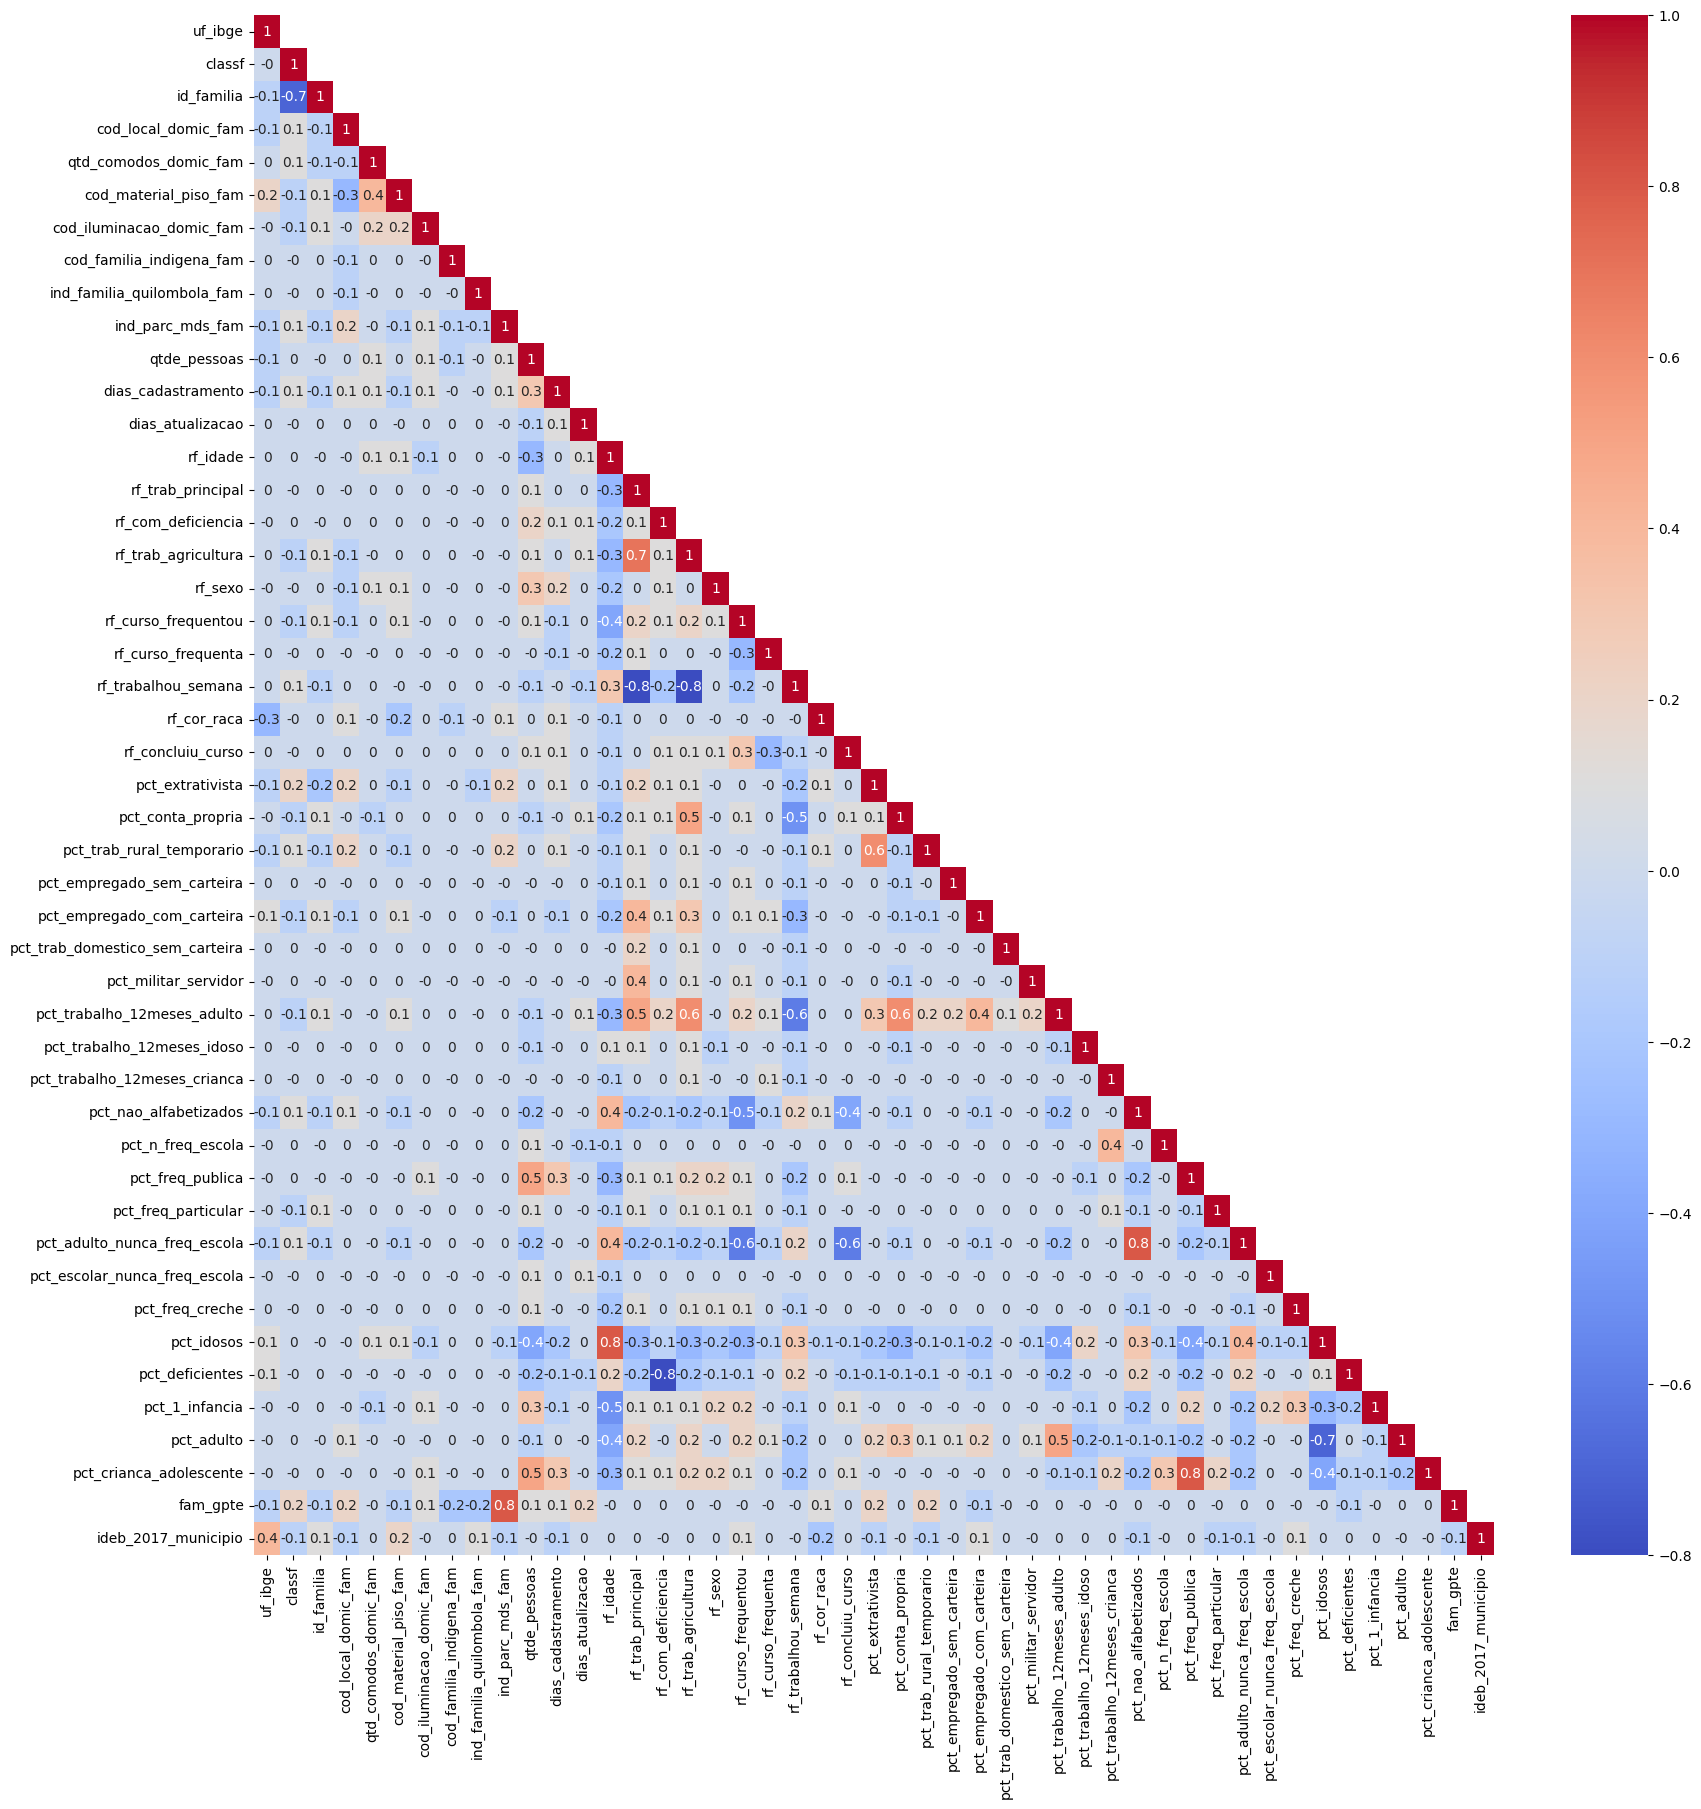

In [79]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'fam_gpte',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [80]:
import numpy as np
import pandas as pd

# Selecionar apenas as colunas numéricas
numeric_cols = df_features.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_features[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.8
corr_strong = corr_matrix[abs(corr_matrix) > 0.8]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        # Evita a auto-correlacão (corr = 1)
        if col != row and corr_strong.loc[row, col] > 0.8:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")


Correlação forte entre pct_adulto_nunca_freq_escola e pct_nao_alfabetizados: 0.8128946407705234
Correlação forte entre pct_nao_alfabetizados e pct_adulto_nunca_freq_escola: 0.8128946407705234


In [81]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['pct_adulto_nunca_freq_escola'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,205.0,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [82]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_

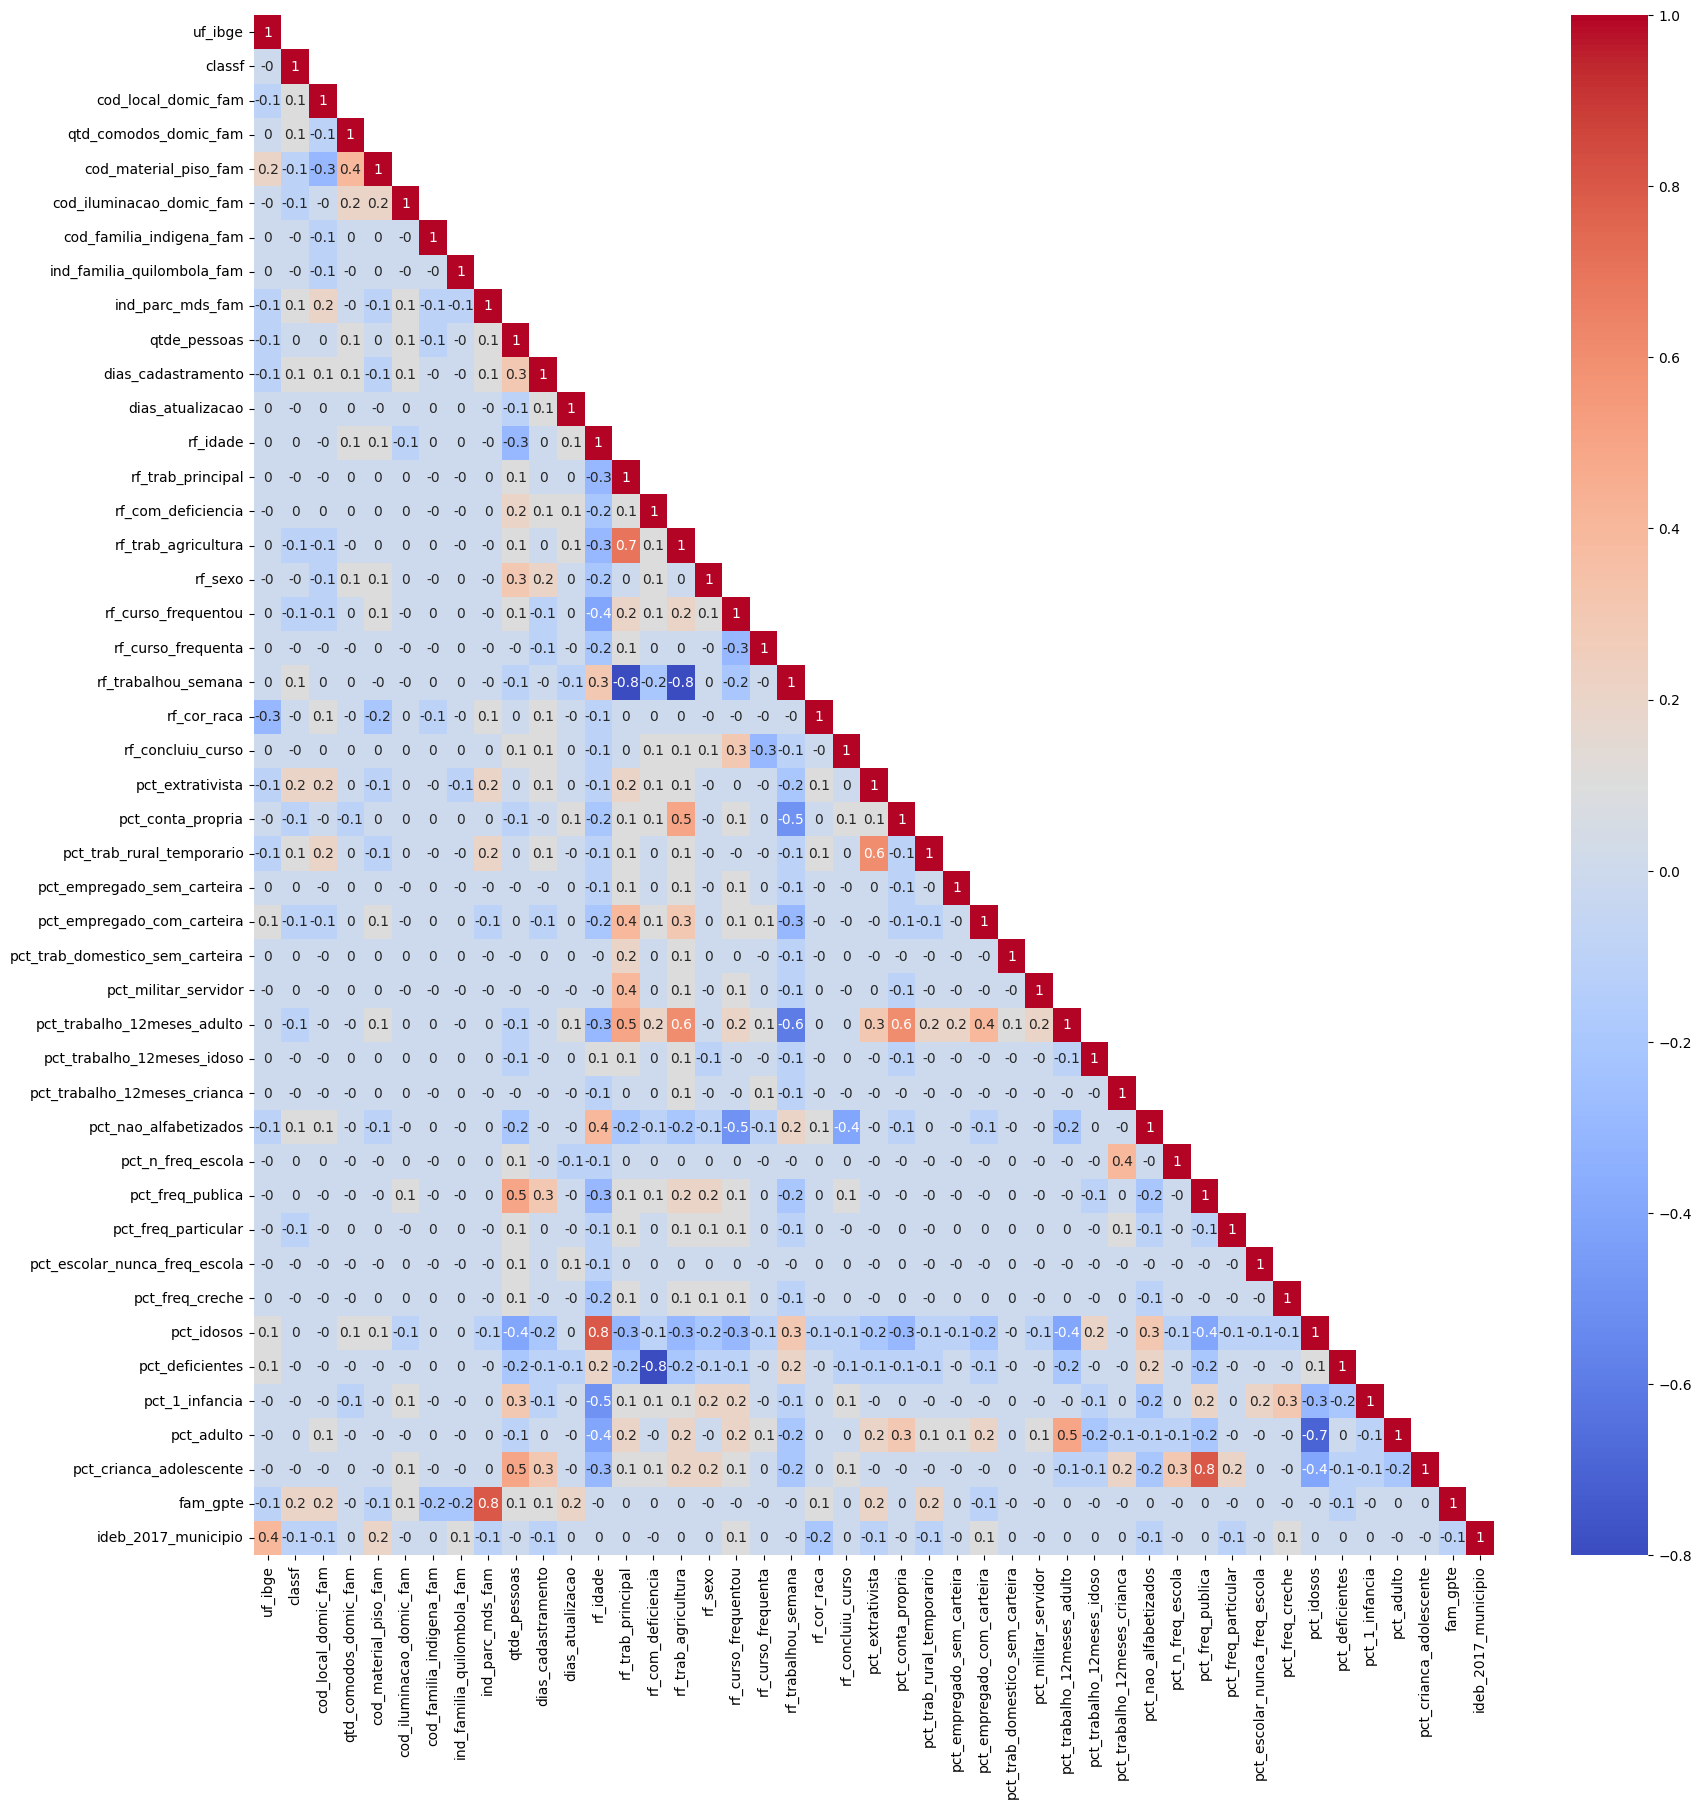

In [83]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [84]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.8
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: rf_com_deficiencia e pct_deficientes, Correlação: 0.84
Colunas: rf_trab_agricultura e rf_trabalhou_semana, Correlação: 0.81


In [85]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['pct_deficientes', 'rf_trab_agricultura'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,...,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,0.0,...,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,205.0,...,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,0.000000,0.0,4.6


In [86]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',


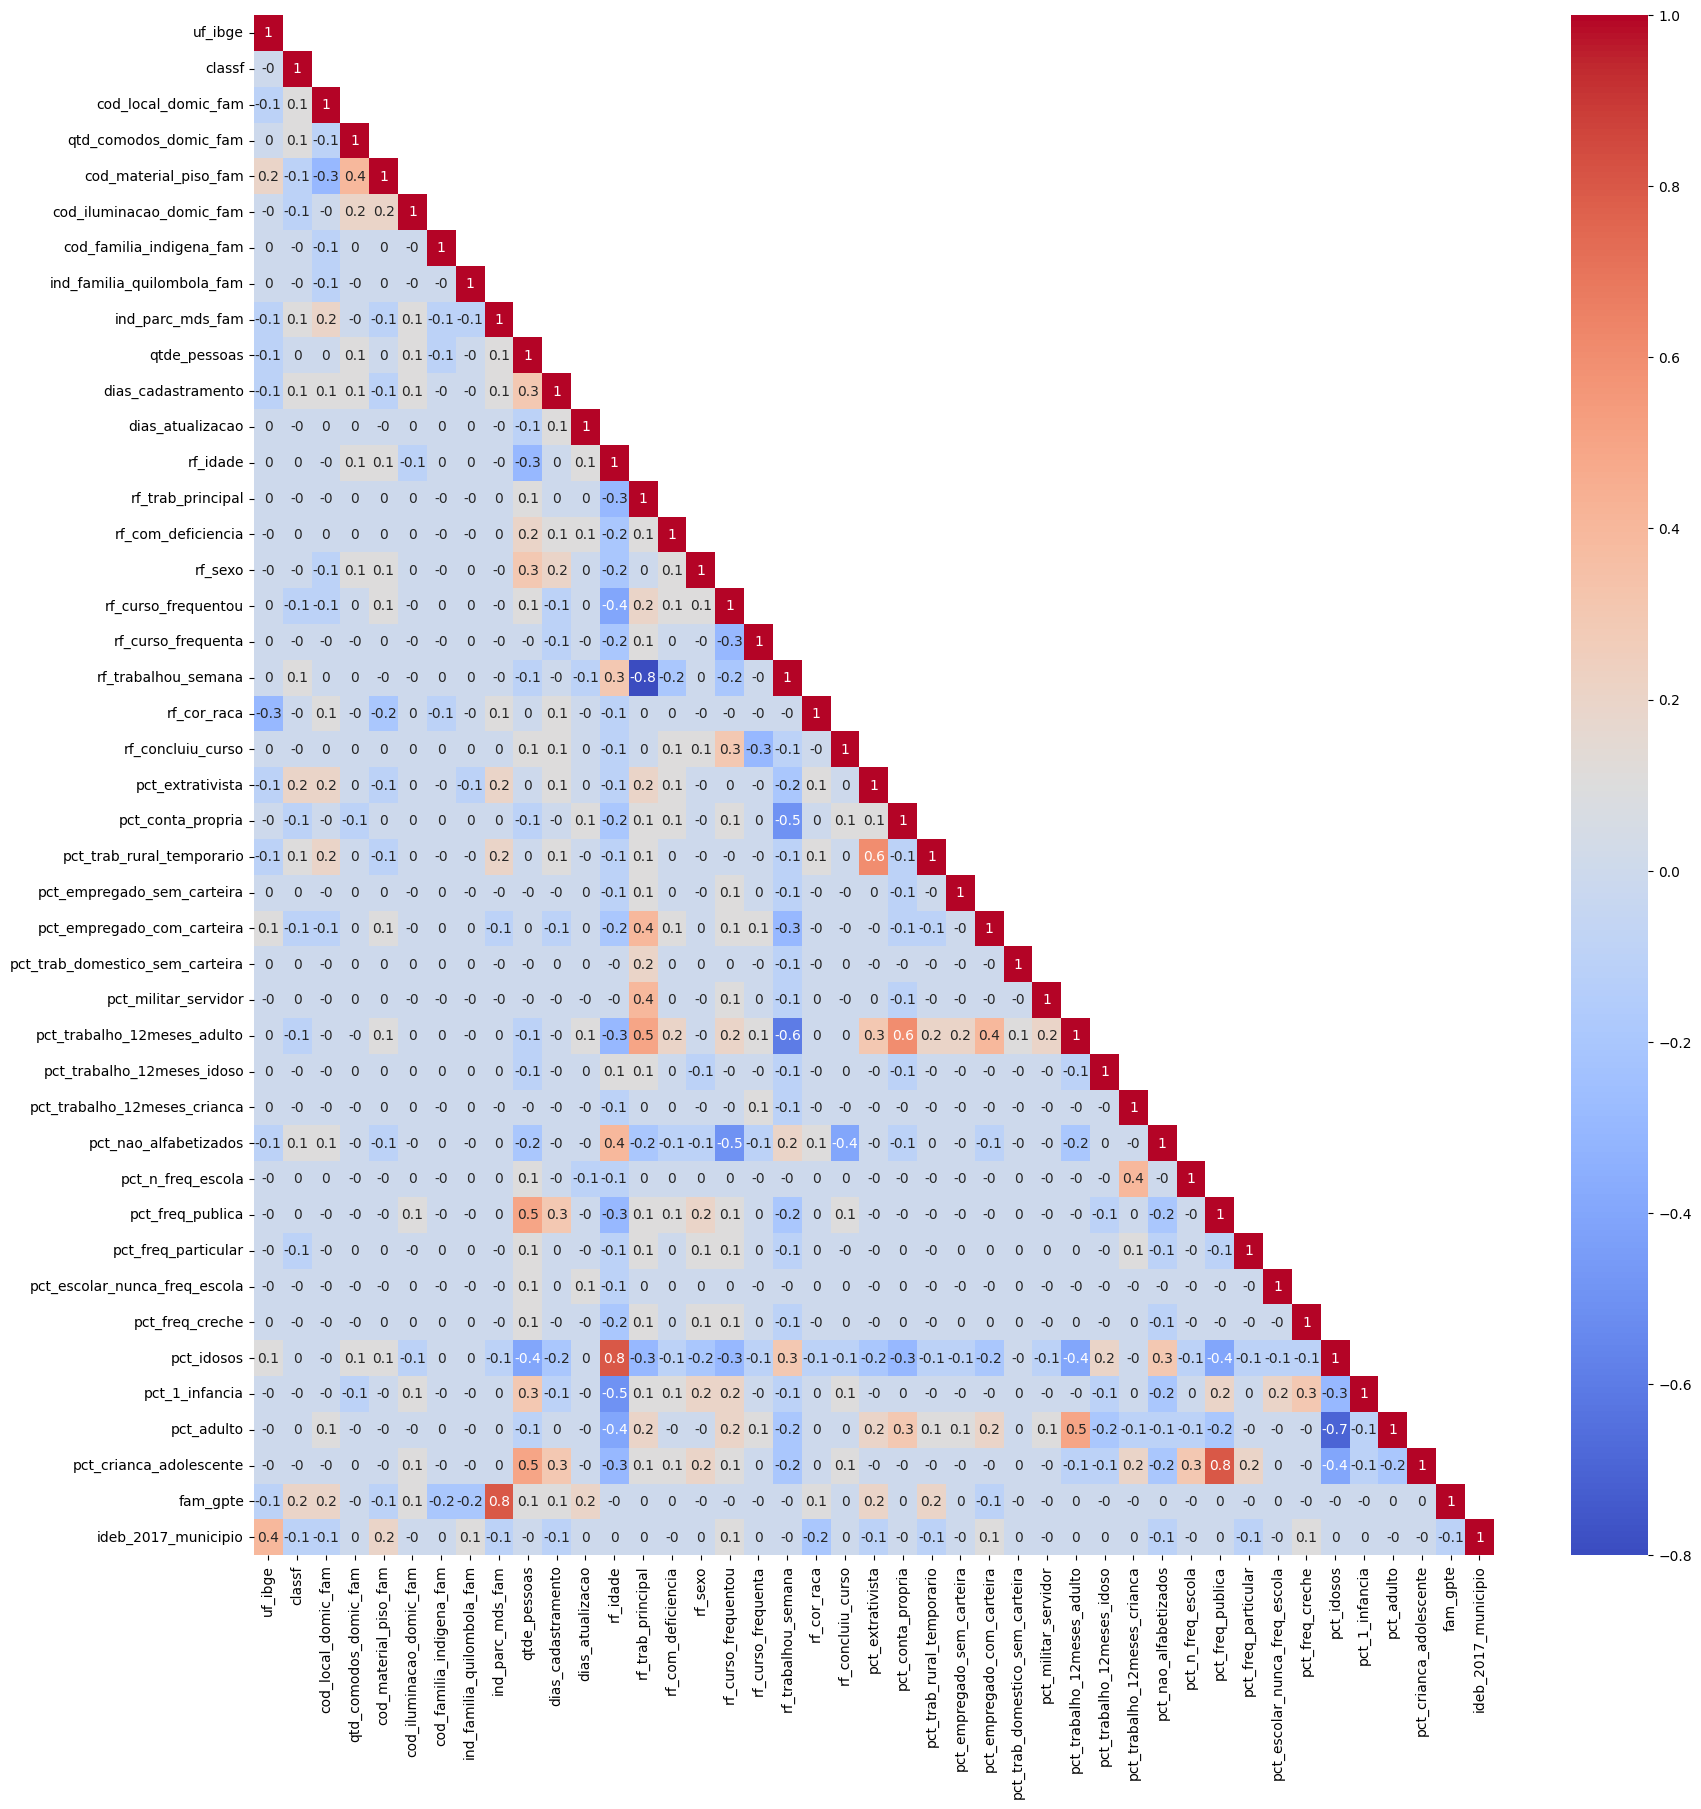

In [87]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'fam_gpte',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [88]:
# Obter a matriz de correlação
corr_matrix = df_features.corr().abs()
threshold = 0.75

# Obter os índices de correlações altas, exceto a diagonal principal
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

# Imprimir os pares de correlação alta
if high_corr_list:  # Verifica se há pares na lista
    for col1, col2, corr_value in high_corr_list:
        print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")
else:
    print("Não tem correlações altas acima do limite estabelecido.")


Colunas: ind_parc_mds_fam e fam_gpte, Correlação: 0.78
Colunas: rf_idade e pct_idosos, Correlação: 0.76
Colunas: rf_trab_principal e rf_trabalhou_semana, Correlação: 0.79
Colunas: pct_freq_publica e pct_crianca_adolescente, Correlação: 0.80


In [89]:
#Retirando features com correlação > 7.5
df_balanceado = df_balanceado.drop(columns=['ind_parc_mds_fam', 'rf_trab_principal', 'pct_crianca_adolescente', 'rf_idade'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,...,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,3,...,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,8,...,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,2,...,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,2,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,3,...,0.000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,4.6


In [90]:
df_balanceado.shape

(96791, 41)

In [91]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'fam_gpte', 'ideb_201

## Criando uma função de processamento OneHotEncoder

In [92]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(df, id_col='id_familia', target_col='classe_renda'):
    # Definir colunas categóricas e numéricas
    binary_cols = ['cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte']  
    multiclass_cols = ['uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam','rf_curso_frequentou','rf_curso_frequenta',
                      'rf_cor_raca', 'rf_concluiu_curso',] 
    numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio'] 
    percentage_cols = ['pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto']  
       
 
    # Verificar se as colunas percentuais estão no formato correto
    for col in percentage_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Certificar-se de que a coluna de identificação está em formato de string
    df[id_col] = df[id_col].astype(str)

    # Inicializar o OneHotEncoder, considerando os valores -1 como uma categoria válida
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    
    # Aplicar One-Hot Encoding nas colunas binárias
    encoded_binary = encoder.fit_transform(df[binary_cols])
    encoded_binary_df = pd.DataFrame(encoded_binary, columns=encoder.get_feature_names_out(binary_cols))

    # Reinstanciar o OneHotEncoder para as colunas multiclass
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Usando sparse_output
    encoded_multiclass = encoder.fit_transform(df[multiclass_cols])
    encoded_multiclass_df = pd.DataFrame(encoded_multiclass, columns=encoder.get_feature_names_out(multiclass_cols))

    # Concatenar as variáveis numéricas, percentuais e a coluna de identificação com as variáveis categóricas codificadas
    final_df = pd.concat([df[[id_col]].reset_index(drop=True),  # Manter a coluna de ID
                           df[numerical_cols].reset_index(drop=True), 
                           df[percentage_cols].reset_index(drop=True), 
                           encoded_binary_df.reset_index(drop=True), 
                           encoded_multiclass_df.reset_index(drop=True),
                           df[[target_col]].reset_index(drop=True)], 
                          axis=1)

    return final_df




In [93]:
# Chamando a função
df_balanceado = preprocess_data(df_balanceado)
df_balanceado.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,4736936,2.0,3,3290.0,510,4.8,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,2562870,4.0,8,1774.0,101,4.6,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1843654,4.0,2,1966.0,598,4.0,0.0,0.500000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1946851,5.0,2,812.0,285,4.2,0.5,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,4194650,5.0,3,5772.0,591,4.6,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## Criando uma função de normalização das colunas quantitativas

In [94]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def normalize_numerical_columns(df, numerical_cols):
    # Inicializar o MinMaxScaler para normalização entre 0 e 1
    scaler = MinMaxScaler()

    # Criar um Pipeline para normalizar as colunas numéricas
    pipeline = Pipeline(steps=[
        ('scaler', scaler)
    ])
    
    # Aplicar o Pipeline apenas nas colunas numéricas
    df[numerical_cols] = pipeline.fit_transform(df[numerical_cols])

    return df

# Uso n
numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio'] 


In [95]:
# Chamando a função
df_balanceado = normalize_numerical_columns(df_balanceado, numerical_cols)
df_balanceado.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,4736936,0.142857,0.166667,0.500306,0.331317,0.574257,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,2562870,0.238095,0.583333,0.268572,0.056452,0.554455,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1843654,0.238095,0.083333,0.297921,0.390457,0.495050,0.0,0.500000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1946851,0.285714,0.083333,0.121522,0.180108,0.514851,0.5,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,4194650,0.285714,0.166667,0.879700,0.385753,0.554455,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [96]:
# Ajustar a configuração do Pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)


In [97]:
# Exibir todas as colunas do DataFrame final
print(df_balanceado.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_com_deficiencia_2', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35'

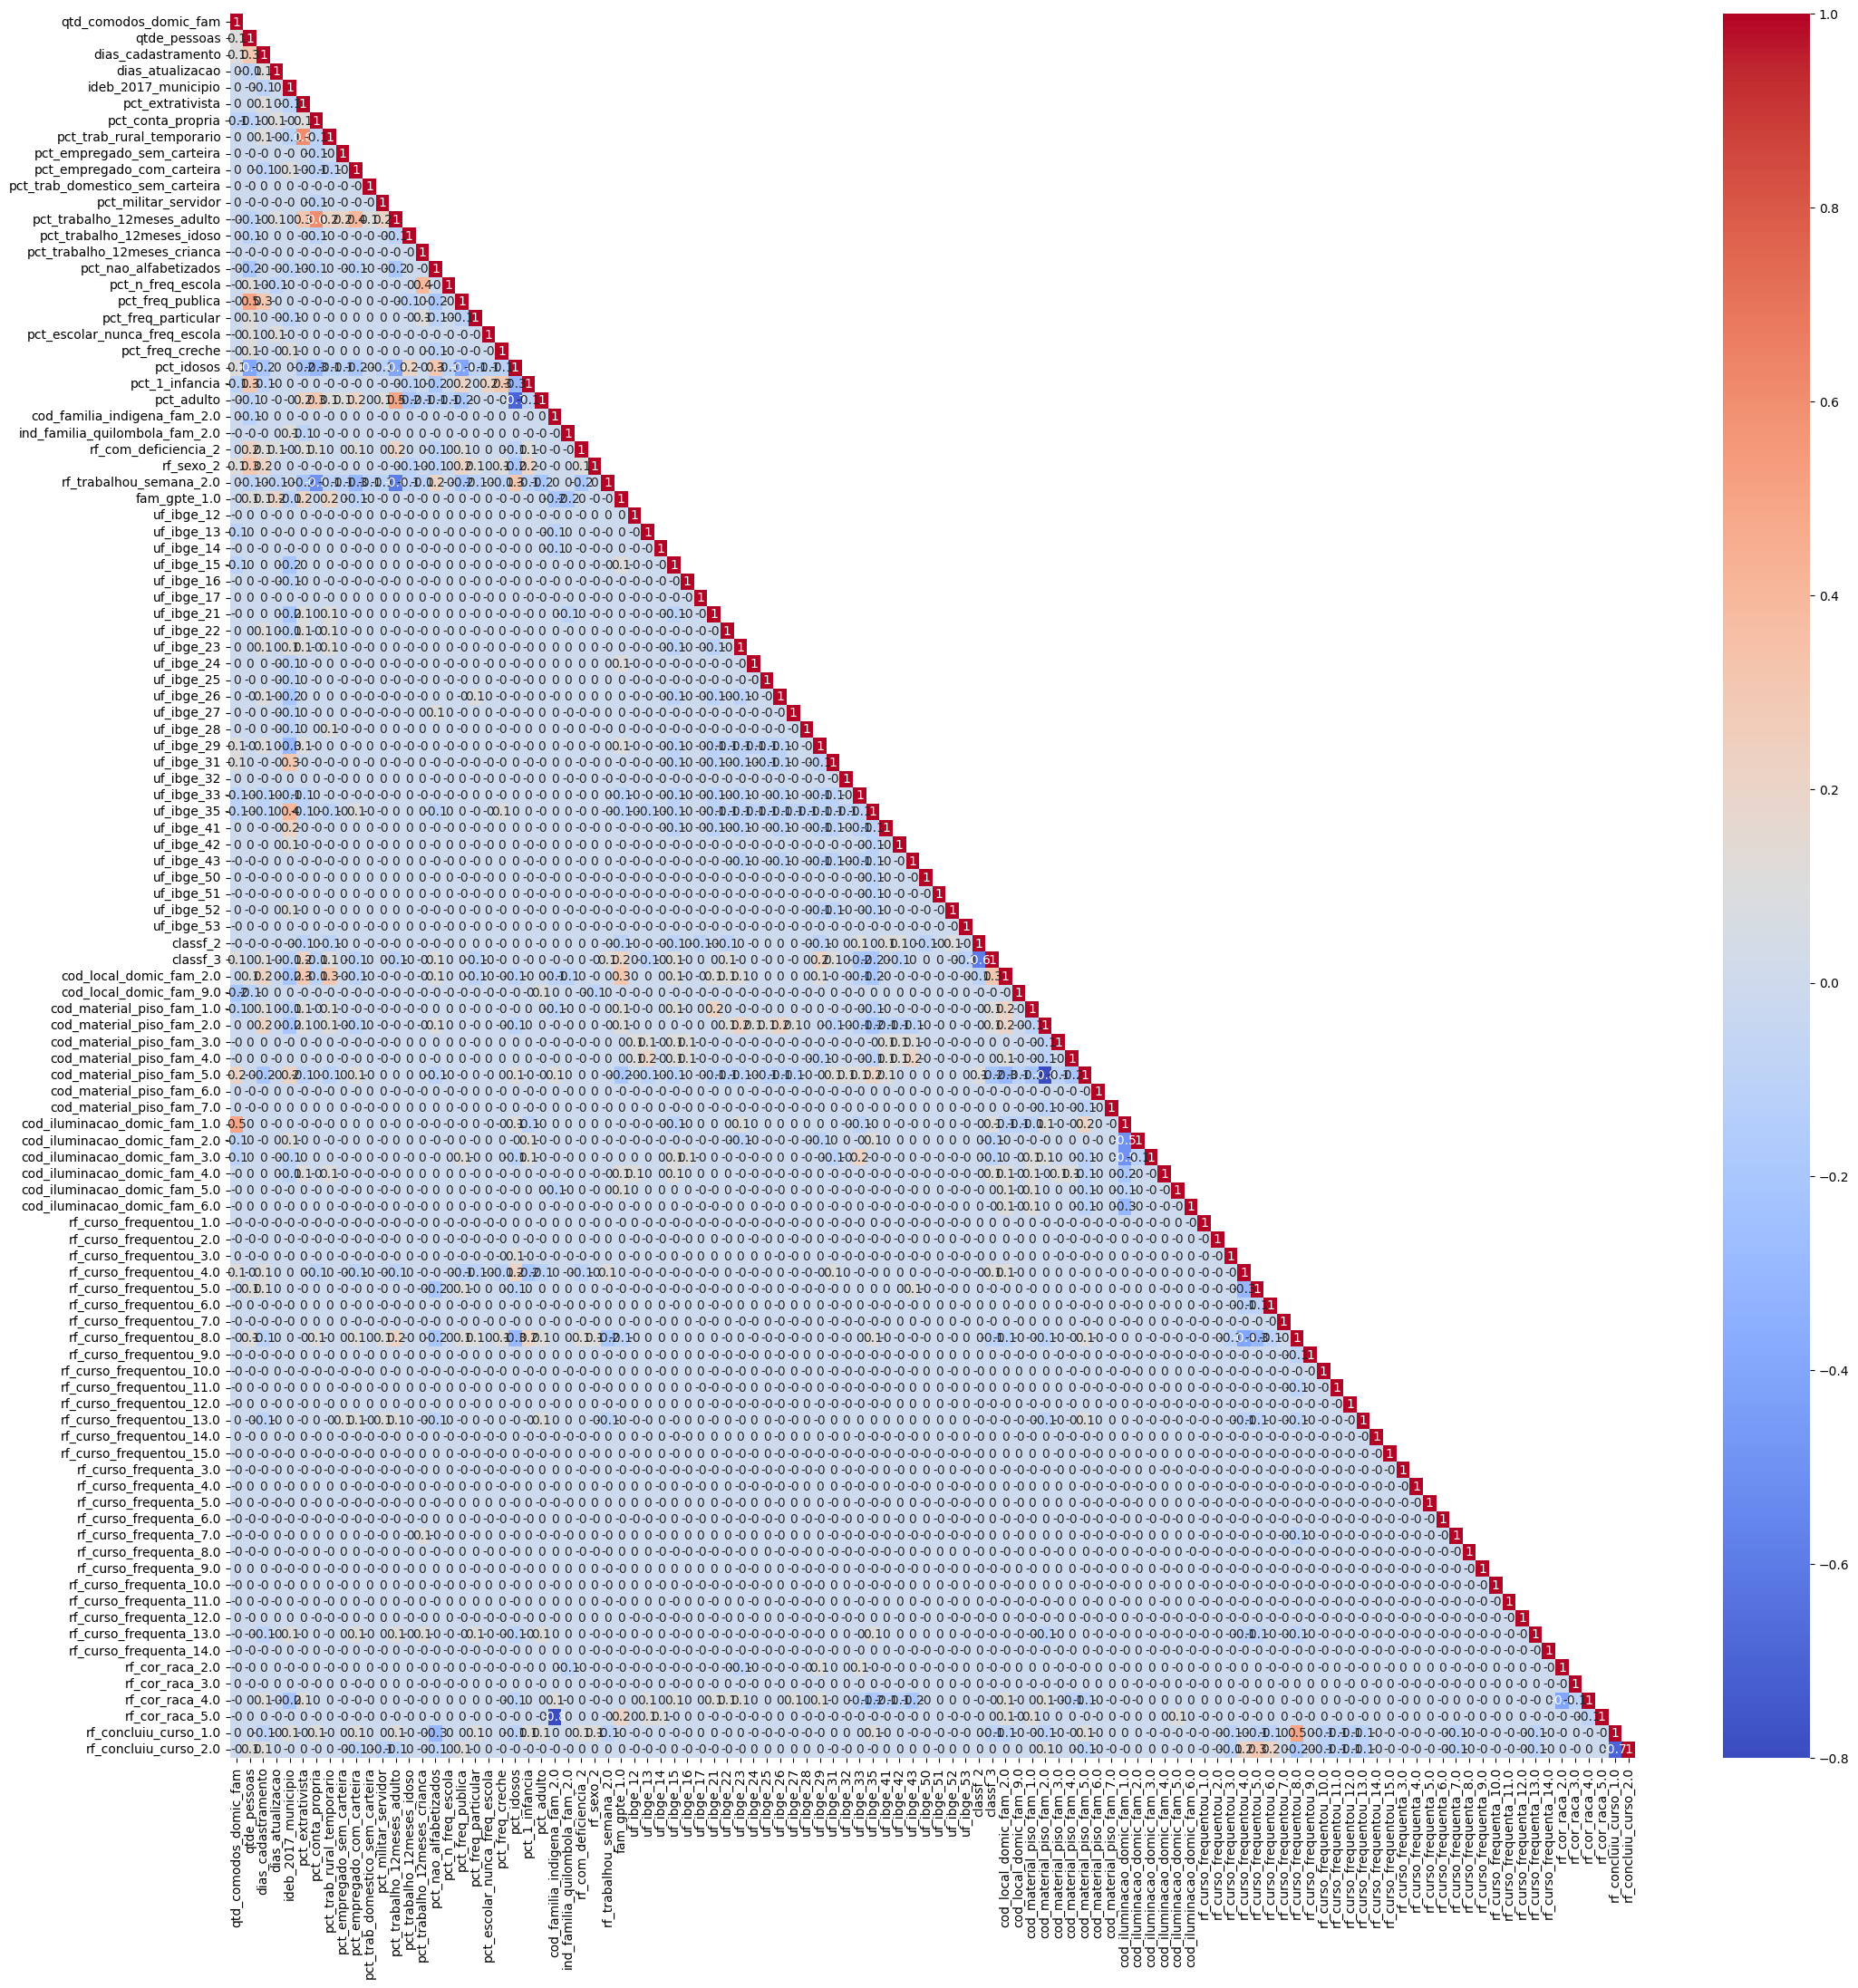

In [99]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
                         'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
                         'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche',
                         'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_com_deficiencia_2', 'rf_sexo_2', 'rf_trabalhou_semana_2.0',
                         'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25',
                         'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41', 'uf_ibge_42', 'uf_ibge_43', 'uf_ibge_50',
                         'uf_ibge_51', 'uf_ibge_52', 'uf_ibge_53', 'classf_2', 'classf_3', 'cod_local_domic_fam_2.0', 'cod_local_domic_fam_9.0', 'cod_material_piso_fam_1.0', 'cod_material_piso_fam_2.0',
                         'cod_material_piso_fam_3.0', 'cod_material_piso_fam_4.0', 'cod_material_piso_fam_5.0', 'cod_material_piso_fam_6.0', 'cod_material_piso_fam_7.0', 'cod_iluminacao_domic_fam_1.0',
                         'cod_iluminacao_domic_fam_2.0', 'cod_iluminacao_domic_fam_3.0', 'cod_iluminacao_domic_fam_4.0', 'cod_iluminacao_domic_fam_5.0', 'cod_iluminacao_domic_fam_6.0',
                         'rf_curso_frequentou_1.0', 'rf_curso_frequentou_2.0', 'rf_curso_frequentou_3.0', 'rf_curso_frequentou_4.0', 'rf_curso_frequentou_5.0', 'rf_curso_frequentou_6.0', 
                         'rf_curso_frequentou_7.0', 'rf_curso_frequentou_8.0', 'rf_curso_frequentou_9.0', 'rf_curso_frequentou_10.0', 'rf_curso_frequentou_11.0', 'rf_curso_frequentou_12.0',
                         'rf_curso_frequentou_13.0', 'rf_curso_frequentou_14.0', 'rf_curso_frequentou_15.0', 'rf_curso_frequenta_3.0', 'rf_curso_frequenta_4.0', 'rf_curso_frequenta_5.0', 
                         'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0', 'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0', 'rf_curso_frequenta_10.0', 'rf_curso_frequenta_11.0', 
                         'rf_curso_frequenta_12.0', 'rf_curso_frequenta_13.0', 'rf_curso_frequenta_14.0', 'rf_cor_raca_2.0', 'rf_cor_raca_3.0', 'rf_cor_raca_4.0', 'rf_cor_raca_5.0', 
                         'rf_concluiu_curso_1.0', 'rf_concluiu_curso_2.0']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(25,25))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [100]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.75
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: cod_familia_indigena_fam_2.0 e rf_cor_raca_5.0, Correlação: 0.80
Colunas: cod_material_piso_fam_2.0 e cod_material_piso_fam_5.0, Correlação: 0.77


In [101]:
df_balanceado = df_balanceado.drop(columns=['rf_cor_raca_5.0', 'cod_material_piso_fam_5.0'])

In [103]:
print(df_balanceado.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_com_deficiencia_2', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35'

## Criando o dataframe X e a variável target y

In [104]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_balanceado[[ 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
                   'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
                   'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 
                   'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_com_deficiencia_2', 'rf_sexo_2', 'rf_trabalhou_semana_2.0',
                   'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 
                   'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41', 'uf_ibge_42', 'uf_ibge_43', 'uf_ibge_50', 'uf_ibge_51', 'uf_ibge_52',
                   'uf_ibge_53', 'classf_2', 'classf_3', 'cod_local_domic_fam_2.0', 'cod_local_domic_fam_9.0', 'cod_material_piso_fam_1.0', 'cod_material_piso_fam_2.0', 'cod_material_piso_fam_3.0',
                   'cod_material_piso_fam_4.0', 'cod_material_piso_fam_6.0', 'cod_material_piso_fam_7.0', 'cod_iluminacao_domic_fam_1.0', 'cod_iluminacao_domic_fam_2.0', 'cod_iluminacao_domic_fam_3.0',
                   'cod_iluminacao_domic_fam_4.0', 'cod_iluminacao_domic_fam_5.0', 'cod_iluminacao_domic_fam_6.0', 'rf_curso_frequentou_1.0', 'rf_curso_frequentou_2.0', 'rf_curso_frequentou_3.0',
                   'rf_curso_frequentou_4.0', 'rf_curso_frequentou_5.0', 'rf_curso_frequentou_6.0', 'rf_curso_frequentou_7.0', 'rf_curso_frequentou_8.0', 'rf_curso_frequentou_9.0',
                   'rf_curso_frequentou_10.0', 'rf_curso_frequentou_11.0', 'rf_curso_frequentou_12.0', 'rf_curso_frequentou_13.0', 'rf_curso_frequentou_14.0', 'rf_curso_frequentou_15.0',
                   'rf_curso_frequenta_3.0', 'rf_curso_frequenta_4.0', 'rf_curso_frequenta_5.0', 'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0', 'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0',
                   'rf_curso_frequenta_10.0', 'rf_curso_frequenta_11.0', 'rf_curso_frequenta_12.0', 'rf_curso_frequenta_13.0', 'rf_curso_frequenta_14.0', 'rf_cor_raca_2.0', 'rf_cor_raca_3.0',
                   'rf_cor_raca_4.0', 'rf_concluiu_curso_1.0', 'rf_concluiu_curso_2.0', ]]
y = df_balanceado['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 104)


,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,cod_familia_indigena_fam_2.0,ind_familia_quilombola_fam_2.0,rf_com_deficiencia_2,rf_sexo_2,rf_trabalhou_semana_2.0,fam_gpte_1.0,uf_ibge_12,uf_ibge_13,uf_ibge_14,uf_ibge_15,uf_ibge_16,uf_ibge_17,uf_ibge_21,uf_ibge_22,uf_ibge_23,uf_ibge_24,uf_ibge_25,uf_ibge_26,uf_ibge_27,uf_ibge_28,uf_ibge_29,uf_ibge_31,uf_ibge_32,uf_ibge_33,uf_ibge_35,uf_ibge_41,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classf_2,classf_3,cod_local_domic_fam_2.0,cod_local_domic_fam_9.0,cod_material_piso_fam_1.0,cod_material_piso_fam_2.0,cod_material_piso_fam_3.0,cod_material_piso_fam_4.0,cod_material_piso_fam_6.0,cod_material_piso_fam_7.0,cod_iluminacao_domic_fam_1.0,cod_iluminacao_domic_fam_2.0,cod_iluminacao_domic_fam_3.0,cod_iluminacao_domic_fam_4.0,cod_iluminacao_domic_fam_5.0,cod_iluminacao_domic_fam_6.0,rf_curso_frequentou_1.0,rf_curso_frequentou_2.0,rf_curso_frequentou_3.0,rf_curso_frequentou_4.0,rf_curso_frequentou_5.0,rf_curso_frequentou_6.0,rf_curso_frequentou_7.0,rf_curso_frequentou_8.0,rf_curso_frequentou_9.0,rf_curso_frequentou_10.0,rf_curso_frequentou_11.0,rf_curso_frequentou_12.0,rf_curso_frequentou_13.0,rf_curso_frequentou_14.0,rf_curso_frequentou_15.0,rf_curso_frequenta_3.0,rf_curso_frequenta_4.0,rf_curso_frequenta_5.0,rf_curso_frequenta_6.0,rf_curso_frequenta_7.0,rf_curso_frequenta_8.0,rf_curso_frequenta_9.0,rf_curso_frequenta_10.0,rf_curso_frequenta_11.0,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0
0,0.142857,0.166667,0.500306,0.331317,0.574257,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.238095,0.583333,0.268572,0.056452,0.554455,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.238095,0.083333,0.297921,0.390457,0.495050,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.285714,0.083333,0.121522,0.180108,0.514851,0.5,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.285714,0.166667,0.879700,0.385753,0.554455,

In [105]:
# Verificar a presença de valores NaN
print(X.isnull().sum())

qtd_comodos_domic_fam    0
qtde_pessoas             0
dias_cadastramento       0
dias_atualizacao         0
ideb_2017_municipio      0
                        ..
rf_cor_raca_2.0          0
rf_cor_raca_3.0          0
rf_cor_raca_4.0          0
rf_concluiu_curso_1.0    0
rf_concluiu_curso_2.0    0
Length: 104, dtype: int64


In [106]:
y.tail()

96786    2
96787    2
96788    2
96789    2
96790    2
Name: classe_renda, dtype: int64

In [107]:
y.value_counts()

classe_renda
2    32786
0    32089
1    31916
Name: count, dtype: int64

In [108]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Treinando os modelos com validação cruzada

In [112]:
# Importar as bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 

# Definir os modelos e os parâmetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [300, 350],
            'classifier__max_depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [500, 600],
            'classifier__depth': [2, 3],
            'classifier__learning_rate': [0.1]
    }
  }
}


In [113]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 30, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 350}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 600, 'classifier__learning_rate': 0.1}


## Avaliando os modelos

In [114]:
from sklearn.metrics import accuracy_score, f1_score

In [115]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")

Modelo: RandomForest
  F1 Score: 0.73
  Acurácia: 0.73
Modelo: XGBoost
  F1 Score: 0.73
  Acurácia: 0.73
Modelo: CatBoost
  F1 Score: 0.73
  Acurácia: 0.73


In [116]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

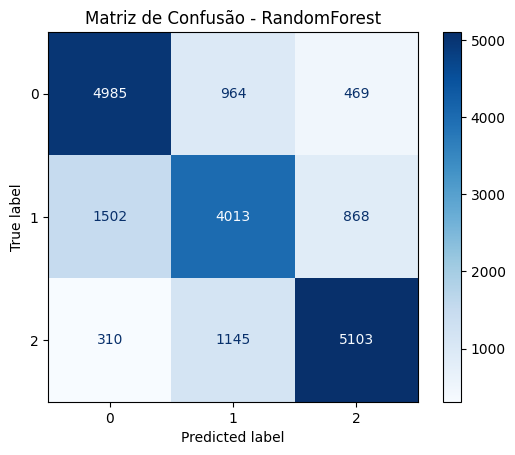

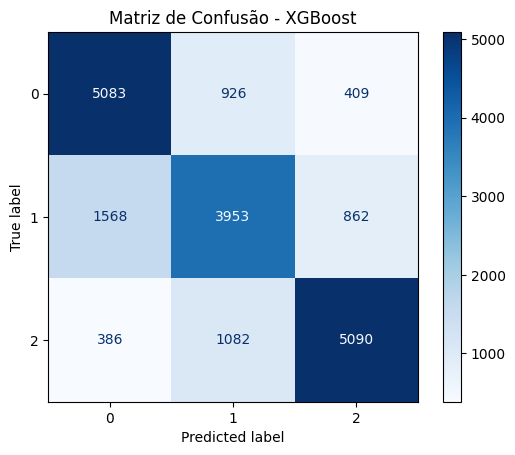

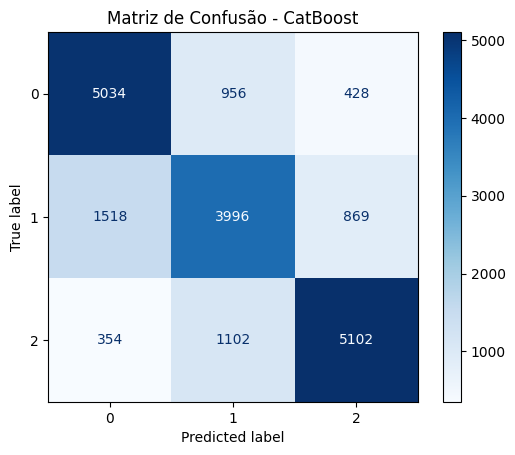

In [117]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

## Fazendo um ensemble com os modelos treinados

In [118]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
# Criar Ensemble com Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_models['RandomForest']),  # Melhor estimador Random Forest
        ('xgb', best_models['XGBoost']),      # Melhor estimador XGBoost
        ('cat', best_models['CatBoost'])       # Melhor estimador CatBoost
    ],
    voting='hard'  # Usar 'hard' para voto majoritário
)



In [119]:
for model_name, model in best_models.items():
    unique_classes = set(model.classes_)
    print(f"{model_name} classes: {unique_classes}")


RandomForest classes: {0, 1, 2}
XGBoost classes: {0, 1, 2}
CatBoost classes: {0, 1, 2}


In [121]:
from sklearn.metrics import classification_report

# Criar Ensemble com Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_models['RandomForest']),
        ('xgb', best_models['XGBoost']),
        ('cat', best_models['CatBoost'])
    ],
    voting='soft'  # Mude para 'soft' para combinar as probabilidades
)

# Ajustar o ensemble com o conjunto de treino
voting_clf.fit(X_train, y_train)

# Fazer previsões com o ensemble
y_pred_ensemble = voting_clf.predict(X_test)

# Avaliar Ensemble
print("Relatório de Classificação - Ensemble (Voting Classifier):")
print(classification_report(y_test, y_pred_ensemble))





Relatório de Classificação - Ensemble (Voting Classifier):
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      6418
           1       0.66      0.62      0.64      6383
           2       0.80      0.78      0.79      6558

    accuracy                           0.73     19359
   macro avg       0.73      0.73      0.73     19359
weighted avg       0.73      0.73      0.73     19359



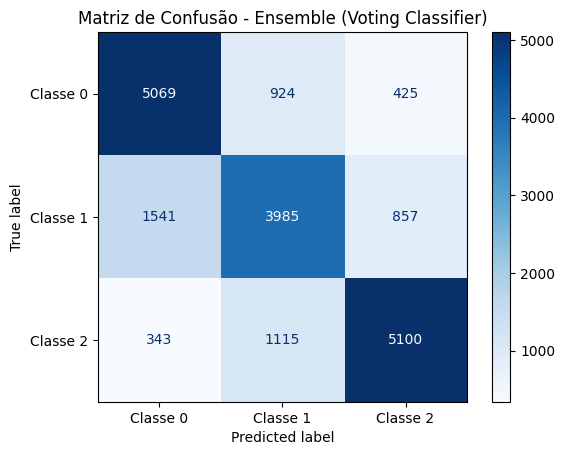

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de Confusão para o Ensemble
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=['Classe 0', 'Classe 1', 'Classe 2'])
disp_ensemble.plot(cmap='Blues')
plt.title('Matriz de Confusão - Ensemble (Voting Classifier)')
plt.show()

## Ajustando o parâmetro threshold

In [138]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Criar o pipeline para o 1º modelo
pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', CatBoostClassifier(silent=True, iterations=600, depth=3, learning_rate=0.1))
])

# Ajustar o 1º modelo
pipeline_1.fit(X_train, y_train)

# Fazendo previsões com o 1º modelo
y_pred_1 = pipeline_1.predict(X_test)

# Avaliar o 1º modelo
accuracy_anterior = accuracy_score(y_test, y_pred_1)
print("Acurácia do 1º modelo:", accuracy_anterior)

# Calcular AUC para o 1º modelo
y_scores_1 = pipeline_1.predict_proba(X_test)  # Probabilidades para AUC
auc_anterior = roc_auc_score(y_test, y_scores_1, multi_class='ovr')
print("AUC do 1º modelo:", auc_anterior)

# Exibir informações sobre o limiar de classificação
print("Probabilidades previstas para a 1ª classe:")
print(pipeline_1.predict_proba(X_test)[:, 1])  # Usar predict_proba para obter as probabilidades

print("Previsões com limiar de 0.5:")
print((pipeline_1.predict_proba(X_test)[:, 1] >= 0.5).astype(int))  # Usar 0.5 como limiar para as predições

# Alterar o limiar de probabilidade para 0.3
print("Previsões após definir limiar de 0.3:")
print((pipeline_1.predict_proba(X_test)[:, 1] >= 0.3).astype(int))  # Usar 0.3 como novo limiar


Acurácia do 1º modelo: 0.7299963841107495
AUC do 1º modelo: 0.8886519956891833
Probabilidades previstas para a 1ª classe:
[0.5079283  0.64036082 0.6240182  ... 0.08920059 0.3334581  0.26116365]
Previsões com limiar de 0.5:
[1 1 1 ... 0 0 0]
Previsões após definir limiar de 0.3:
[1 1 1 ... 0 1 0]


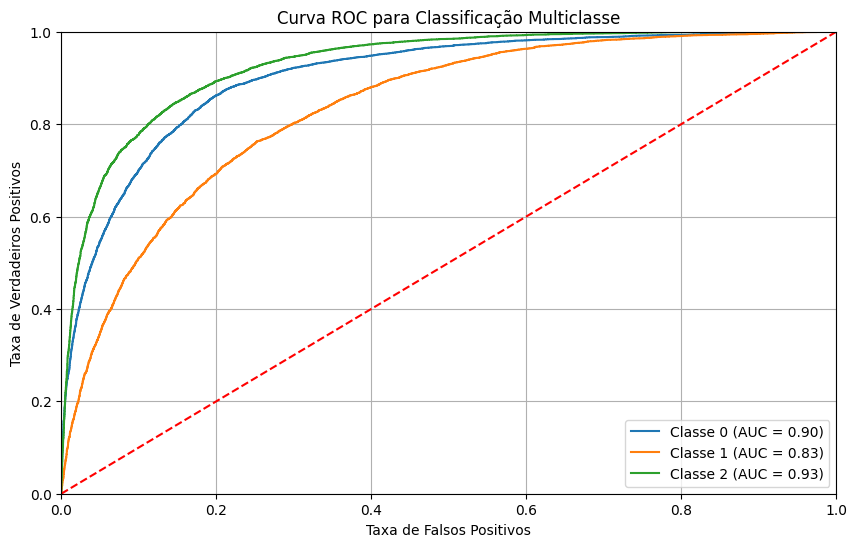

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Suponha que y_test seja a variável target com 3 classes: 0, 1 e 2
# Binarizar as classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Obter as probabilidades para cada classe usando o pipeline_1
y_scores = pipeline_1.predict_proba(X_test)

# Criar um gráfico para cada classe
plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

# Plotar a linha diagonal
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # linha de aleatoriedade
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Classificação Multiclasse')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Encontrando os melhores hiperparâmetros

In [141]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a serem otimizados
param_grid = {
    'classifier__iterations': [500, 600, 700],
    'classifier__depth': [3, 4, 5],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__l2_leaf_reg': [1, 3, 5]  # Regularização L2
}

# Criar o GridSearchCV para o pipeline_1
grid_search = GridSearchCV(pipeline_1, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

# Ajustar o modelo
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

C:\Users\Admin\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores hiperparâmetros: {'classifier__depth': 3, 'classifier__iterations': 500, 'classifier__l2_leaf_reg': 1, 'classifier__learning_rate': 0.05}


# Estimação padrão

In [144]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Definindo os melhores hiperparâmetros (diferentes do pipeline_1)
best_params_2 = {
    'depth': 3,  
    'iterations': 500,  
    'learning_rate': 0.05, 
    'l2_leaf_reg': 1,  
    'silent': True
}

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criar o pipeline com os melhores parâmetros alternativos
pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', CatBoostClassifier(**best_params_2))  # Passando os parâmetros corretamente
])

# Ajustar o modelo
pipeline_2.fit(X_train, y_train)

# Avaliando o modelo com validação cruzada
scores = cross_val_score(pipeline_2, X_train, y_train, cv=skf, scoring='accuracy')
print("Scores de validação cruzada (2º modelo):", scores)
print("Acurácia média (2º modelo):", scores.mean())

# Fazendo previsões
y_pred_2 = pipeline_2.predict(X_test) 

# Avaliar o modelo
print("Relatório de classificação (2º modelo):")
print(classification_report(y_test, y_pred_2))  
print("Acurácia (2º modelo):", accuracy_score(y_test, y_pred_2))



Scores de validação cruzada (2º modelo): [0.72628656 0.72189578 0.72155495 0.71877825 0.72542942]
Acurácia média (2º modelo): 0.7227889941579946
Relatório de classificação (2º modelo):
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6418
           1       0.66      0.61      0.63      6383
           2       0.79      0.77      0.78      6558

    accuracy                           0.72     19359
   macro avg       0.72      0.72      0.72     19359
weighted avg       0.72      0.72      0.72     19359

Acurácia (2º modelo): 0.7238493723849372


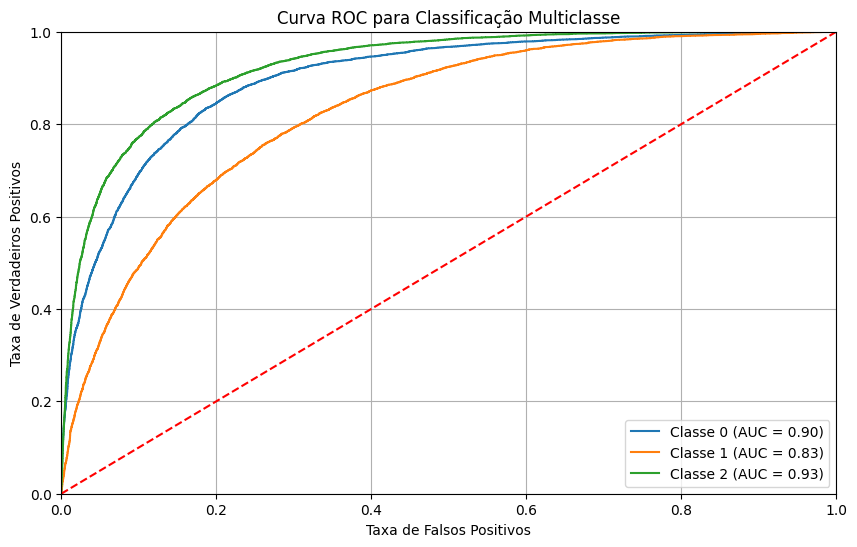

In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar as classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Substitua pelos rótulos das suas classes
n_classes = y_test_bin.shape[1]

# Fazer previsões de probabilidade com o pipeline_2
y_scores = pipeline_2.predict_proba(X_test)

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Calcular a curva ROC e AUC para cada classe
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Classe {} (AUC = {:.2f})'.format(i, roc_auc))

# Adicionar a linha diagonal
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Classificação Multiclasse')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Comparando os dois modelos

In [146]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Ajustar e avaliar o pipeline_1
pipeline_1.fit(X_train, y_train)
y_pred_1 = pipeline_1.predict(X_test)
y_scores_1 = pipeline_1.predict_proba(X_test)

# Calcular as métricas para pipeline_1
accuracy_1 = accuracy_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1, average='weighted')  # Usando average='weighted' para multiclasse
f1_score_1 = f1_score(y_test, y_pred_1, average='weighted')
auc_1 = roc_auc_score(y_test_bin, y_scores_1, multi_class='ovr')  # Usando 'ovr' para multiclass

# Ajustar e avaliar o pipeline_2
pipeline_2.fit(X_train, y_train)
y_pred_2 = pipeline_2.predict(X_test)
y_scores_2 = pipeline_2.predict_proba(X_test)

# Calcular as métricas para pipeline_2
accuracy_2 = accuracy_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2, average='weighted')  # Usando average='weighted' para multiclasse
f1_score_2 = f1_score(y_test, y_pred_2, average='weighted')
auc_2 = roc_auc_score(y_test_bin, y_scores_2, multi_class='ovr')  # Usando 'ovr' para multiclass

# Criar um resumo dos resultados
results = {
    'Metric': ['Acurácia', 'Recall', 'F1 Score', 'AUC'],
    'Pipeline 1': [accuracy_1, recall_1, f1_score_1, auc_1],
    'Pipeline 2': [accuracy_2, recall_2, f1_score_2, auc_2]
}

# Exibir os resultados
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)


     Metric  Pipeline 1  Pipeline 2
0  Acurácia    0.729996    0.723849
1    Recall    0.729996    0.723849
2  F1 Score    0.729167    0.722423
3       AUC    0.888652    0.883773


In [147]:
# Exibir o DataFrame final
results_df.head()

,Metric,Pipeline 1,Pipeline 2
0,Acurácia,0.729996,0.723849
1,Recall,0.729996,0.723849
2,F1 Score,0.729167,0.722423
3,AUC,0.888652,0.883773


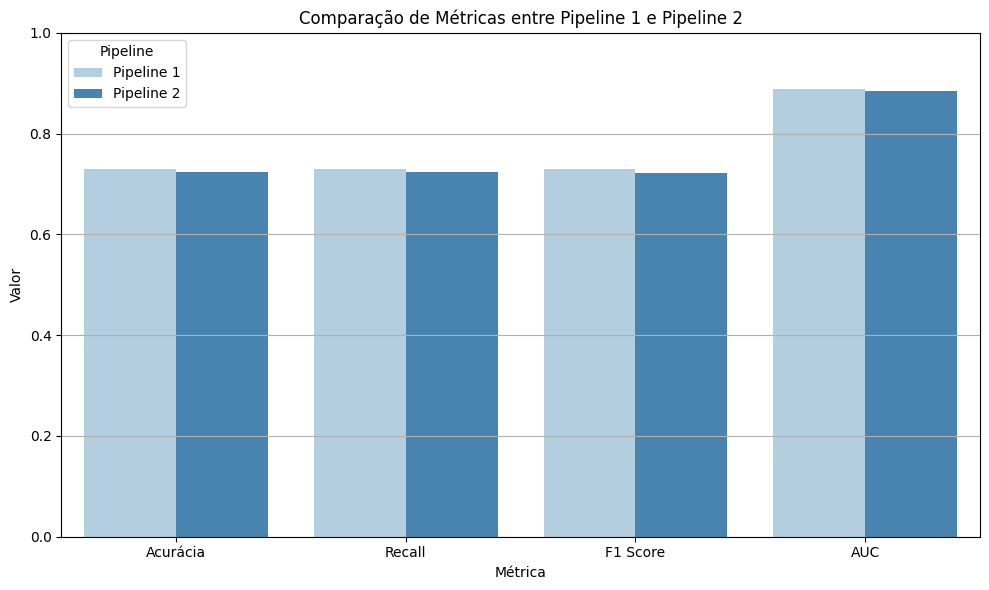

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Considerando o results_df 
results_df = pd.DataFrame({
    'Metric': ['Acurácia', 'Recall', 'F1 Score', 'AUC'],
    'Pipeline 1': [0.729996, 0.729996, 0.729167, 0.888652],
    'Pipeline 2': [0.723849, 0.723849, 0.722423, 0.883773]
})

# Reshape do DataFrame para long format para visualização
results_melted = results_df.melt(id_vars=['Metric'], 
                                 value_vars=['Pipeline 1', 'Pipeline 2'], 
                                 var_name='Pipeline', 
                                 value_name='Valor')

# Criar o gráfico de barras para comparação das métricas
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x='Metric', y='Valor', hue='Pipeline', palette='Blues')
plt.title('Comparação de Métricas entre Pipeline 1 e Pipeline 2')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(title='Pipeline')
plt.tight_layout()
plt.show()

